# Support Vector Machine (SVM) – Classification with Scikit-learn

### What is SVM?

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It finds a **hyperplane** that best separates different classes by maximizing the margin between them.

### Key Concepts
- **Support Vectors**: Data points closest to the separating hyperplane.
- **Margin**: Distance between support vectors and hyperplane. SVM maximizes this.
- **Kernel Trick**: Maps data to higher dimensions when classes are not linearly separable.

### Common Kernels:
- `linear`: when data is linearly separable
- `rbf`: radial basis function for non-linear cases
- `poly`: polynomial kernel


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Features shape:", X.shape)
print("Target classes:", np.unique(y))

Features shape: (150, 4)
Target classes: [0 1 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



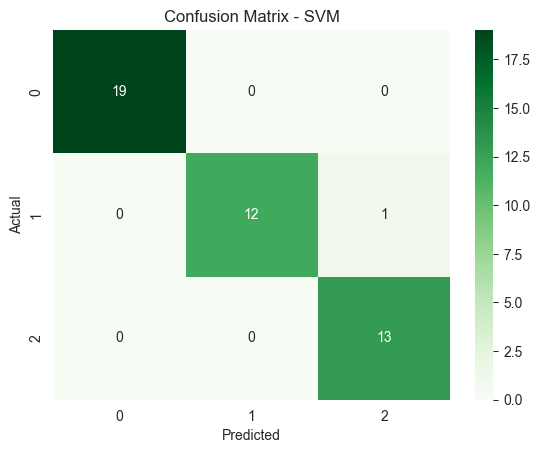

In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [6]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
rbf_pred = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, rbf_pred))

RBF Kernel Accuracy: 1.0


In [7]:
X_vis = iris.data[:, :2]
y_vis = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

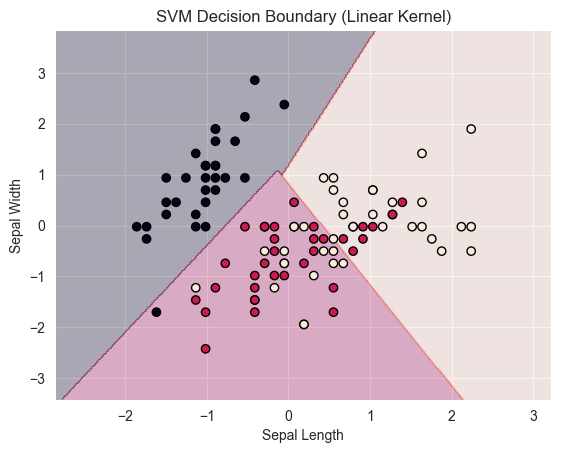

In [11]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Tuned Accuracy: 0.7333333333333333
